In [120]:
import pandas as pd
df=pd.read_csv('C:\\Users\\nEW u\\Desktop\\DataSEts\\news.csv',encoding='ISO-8859-1')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [122]:
# to check the column labels of the DataFrame.
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [123]:
#droping the unwanted columns from the Datasets
df.drop(['Unnamed: 0','title'], axis='columns', inplace=True)

In [124]:
#checking the no. of rows and columns in the Datasets
#there are 6335 rows or records and 2 rows
df.shape

(6335, 2)

In [125]:
#checking the columns labels after dropping the unwanted columns 
df.columns

Index(['text', 'label'], dtype='object')

In [4]:
#checking is there any null values in the Datasets
df.isnull().sum()

text     0
label    0
dtype: int64

In [89]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\public\anacondainstallation\python.exe -m pip install --upgrade pip' command.


In [126]:
#df['label'] is the target columns
#nunique() function return number of unique elements in the object.
df['label'].nunique()

2

In [127]:
#unique() function is used to find the unique elements of an array
df['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [128]:
#value_counts() function returns object containing counts of unique values
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [5]:
#Encode target labels with a value between 0 and n_classes-1.
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
df['label']=scaler.fit_transform(df['label'])

In [6]:
df['label'].unique()

array([0, 1], dtype=int64)

In [7]:
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"â Kaydee King (@KaydeeKing) November 9, 2016...",0
4,It's primary day in New York and front-runners...,1


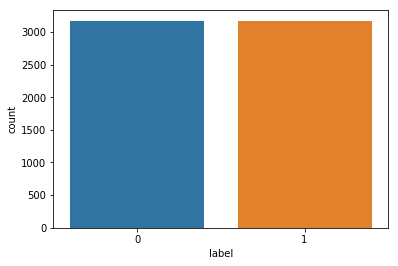

In [8]:
#show the visualizing count of target feature.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(df['label'])

In [9]:
df['label'].value_counts()

1    3171
0    3164
Name: label, dtype: int64

# Now let's clean the text first of all make the copy of the original Dataset so that dosen't effect the original data

In [10]:

df['text'].head(4)

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    â Kaydee King (@KaydeeKing) November 9, 2016...
Name: text, dtype: object

In [11]:
#Now let's clean the text first of all make the copy of the original Dataset so that dosen't affect the original data
message=df.copy()

### Let's take a single paragraph for example message['text'][1] and check how the cleaning is going on after that it will be done in whole datasets.

In [12]:
message['text'][1]

'Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a particularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on the Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not be supporting or defending Trump after a tape was made public in which Trump bragged about assaulting women. Suddenly, Ryan was appearing at a pro-Trump rally and boldly declaring that he already sent in his vote to make him President of the United States. It was a surreal moment. The figurehead of the Republican Party dosed himself in gasoline, got up on a stage on a chilly afternoon in Wisconsin, and lit a match. . @SpeakerRyan says he voted for @realDonaldTrump : â\x80\x9cRepublicans, it is time to come 

In [13]:
para='''Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths 
in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a 
particularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on
the Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not 
be supporting or defending Trump after a tape was made public in which Trump bragged about assaulting women. Suddenly, Ryan 
was appearing at a pro-Trump rally and boldly declaring that he already sent in his vote to make him President of the United
States. It was a surreal moment. The figurehead of the Republican Party dosed himself in gasoline, got up on a stage on a 
chilly afternoon in Wisconsin, and lit a match. . @SpeakerRyan says he voted for @realDonaldTrump : â\x80\x9cRepublicans, 
it is time to come homeâ\x80\x9d https://t.co/VyTT49YvoE pic.twitter.com/wCvSCg4a5I \nâ\x80\x94 ABC News Politics 
(@ABCPolitics) November 5, 2016 \nThe Democratic Party couldnâ\x80\x99t have asked for a better moment of film. 
Ryanâ\x80\x99s chances of ever becoming president went down to zero in an instant. In the wreckage Trump is to 
leave behind in his wake, those who cravenly backed his campaign will not recover. If Ryanâ\x80\x99s career manages to 
limp all the way to 2020, then the DNC will have this tape locked and loaded to be used in every ad until Election Day. 
\nThe ringing endorsement of the man he clearly hates on a personal level speaks volumes about his own spinelessness. 
Ryan has postured himself as a â\x80\x9cprincipledâ\x80\x9d conservative, and one uncomfortable with Trumpâ\x80\x99s 
unapologetic bigotry and sexism. However, when push came to shove, Paul Ryan â\x80\x93 like many of his colleagues
â\x80\x93 turned into a sniveling appeaser. After all his lofty tak about conviction, his principles were a house of 
cards and collapsed with the slightest breeze. \nWhatâ\x80\x99s especially bizarre is how close Ryan came to making it 
through unscathed. For months the Speaker of the House refused to comment on Trump at all. His strategy seemed to be to 
keep his head down, pretend Trump didnâ\x80\x99t exist, and hope that nobody remembered what happened in 2016. Now, just 
days away from the election, he screwed it all up. \nIf 2016â\x80\x99s very ugly election has done any good itâ\x80\x99s 
by exposing the utter cowardice of the Republicans who once feigned moral courage. A reality television star spit on them,
hijacked their party, insulted their wives, and got every last one of them to kneel before him. What a turn of events.
\nFeatured image via Twitter'''

### stemming and cleaning the text

In [14]:
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

review=re.sub(r'http\S+',' ',para) #removing all the link releted text
review = re.sub('[^a-zA-Z]', ' ', review)# removing all the element except a-z and A-Z
review = review.lower()#lowering the text
review = review.split()

#removing all the stopwords and then stemming the text 
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
corpus.append(review)

In [15]:
corpus

['googl pinterest digg linkedin reddit stumbleupon print delici pocket tumblr two fundament truth world paul ryan desper want presid paul ryan never presid today prove particularli stagger exampl polit cowardic paul ryan revers cours announc back trump train aboutfac week ago previous declar would support defend trump tape made public trump brag assault women suddenli ryan appear pro trump ralli boldli declar alreadi sent vote make presid unit state surreal moment figurehead republican parti dose gasolin got stage chilli afternoon wisconsin lit match speakerryan say vote realdonaldtrump republican time come home pic twitter com wcvscg abc news polit abcpolit novemb democrat parti ask better moment film ryan chanc ever becom presid went zero instant wreckag trump leav behind wake cravenli back campaign recov ryan career manag limp way dnc tape lock load use everi ad elect day ring endors man clearli hate person level speak volum spineless ryan postur principl conserv one uncomfort trump

In [16]:
para

'Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths \nin this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a \nparticularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on\nthe Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not \nbe supporting or defending Trump after a tape was made public in which Trump bragged about assaulting women. Suddenly, Ryan \nwas appearing at a pro-Trump rally and boldly declaring that he already sent in his vote to make him President of the United\nStates. It was a surreal moment. The figurehead of the Republican Party dosed himself in gasoline, got up on a stage on a \nchilly afternoon in Wisconsin, and lit a match. . @SpeakerRyan says he voted for @realDonaldTrump : â\x80\x9cRepublicans, \nit is

### Its seems that 80% cleaning is done by stemming now let's check it my lemmatizing

In [17]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

corpus_lem=[]
review=re.sub(r'http\S+',' ',para)#removing all the link releted text
review = re.sub('[^a-zA-Z]', ' ', review)# removing all the element except a-z and A-Z
review = review.lower()#lowering the text
review = review.split()

#removing all the stopwords and then lemmatizing the text 
review=[lem.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
review=' '.join(review)
corpus_lem.append(review)
    
corpus_lem

['google pinterest digg linkedin reddit stumbleupon print delicious pocket tumblr two fundamental truth world paul ryan desperately want president paul ryan never president today proved particularly staggering example political cowardice paul ryan reversed course announced back trump train aboutface week ago previously declared would supporting defending trump tape made public trump bragged assaulting woman suddenly ryan appearing pro trump rally boldly declaring already sent vote make president united state surreal moment figurehead republican party dosed gasoline got stage chilly afternoon wisconsin lit match speakerryan say voted realdonaldtrump republican time come home pic twitter com wcvscg abc news politics abcpolitics november democratic party asked better moment film ryan chance ever becoming president went zero instant wreckage trump leave behind wake cravenly backed campaign recover ryan career manages limp way dnc tape locked loaded used every ad election day ringing endors

In [18]:
para

'Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths \nin this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a \nparticularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on\nthe Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not \nbe supporting or defending Trump after a tape was made public in which Trump bragged about assaulting women. Suddenly, Ryan \nwas appearing at a pro-Trump rally and boldly declaring that he already sent in his vote to make him President of the United\nStates. It was a surreal moment. The figurehead of the Republican Party dosed himself in gasoline, got up on a stage on a \nchilly afternoon in Wisconsin, and lit a match. . @SpeakerRyan says he voted for @realDonaldTrump : â\x80\x9cRepublicans, \nit is

### Now lets apply this in whole datasets for cleaning the text.

In [19]:
#stemming and cleaning
corpus_stem = []
for i in range(0, len(message)):
    review=re.sub(r'http\S+',' ',message['text'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_stem.append(review)

In [20]:
len(message)

6335

In [101]:
df2=pd.DataFrame(df['label'],index=None)

In [103]:
df2['stemming_text']=corpus_stem

In [104]:
df2.head(4)

,label,stemming_text
0,0,daniel greenfield shillman journal fellow free...
1,0,googl pinterest digg linkedin reddit stumbleup...
2,1,u secretari state john f kerri said monday sto...
3,0,kayde king kaydeek novemb lesson tonight dem l...


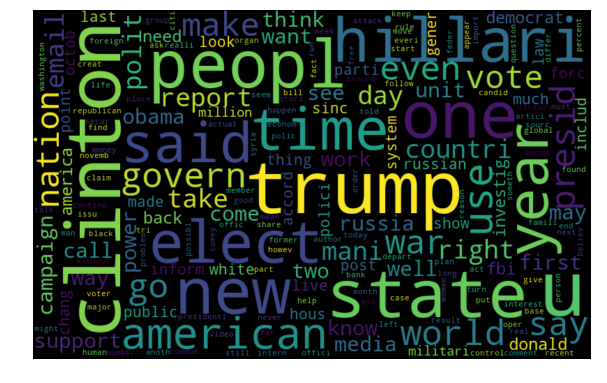

In [106]:
#most common fake words used
from wordcloud import WordCloud
fake_text = df2[df2['label'] == 0]
all_words = ' '.join([text for text in fake_text.stemming_text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

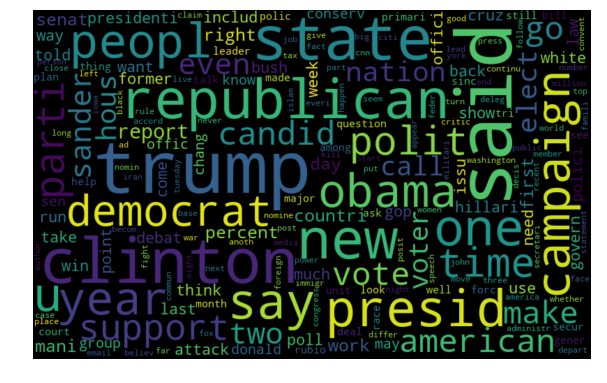

In [107]:
#most common real words used
from wordcloud import WordCloud
fake_text = df2[df2['label'] == 1]
all_words = ' '.join([text for text in fake_text.stemming_text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [115]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'green')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()
    
    


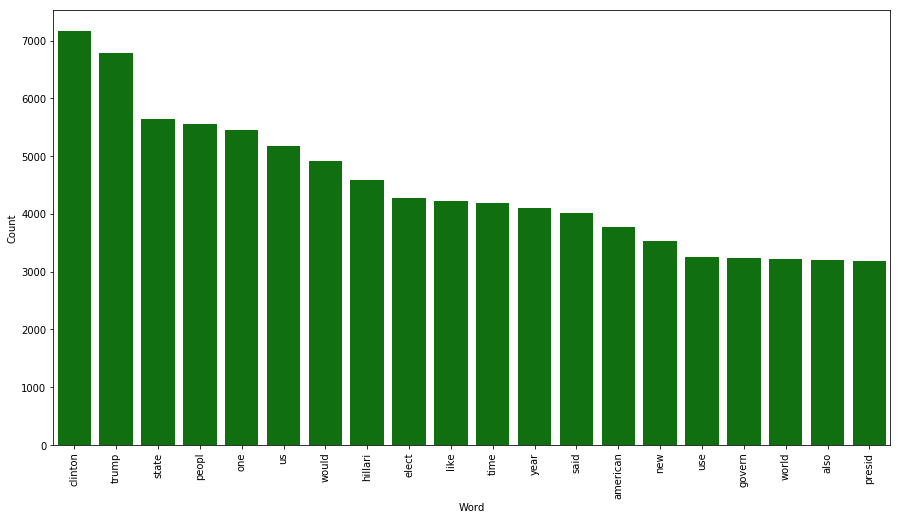

In [116]:
#frequency of most fake words
counter(df2[df2['label'] == 0], 'stemming_text', 20)

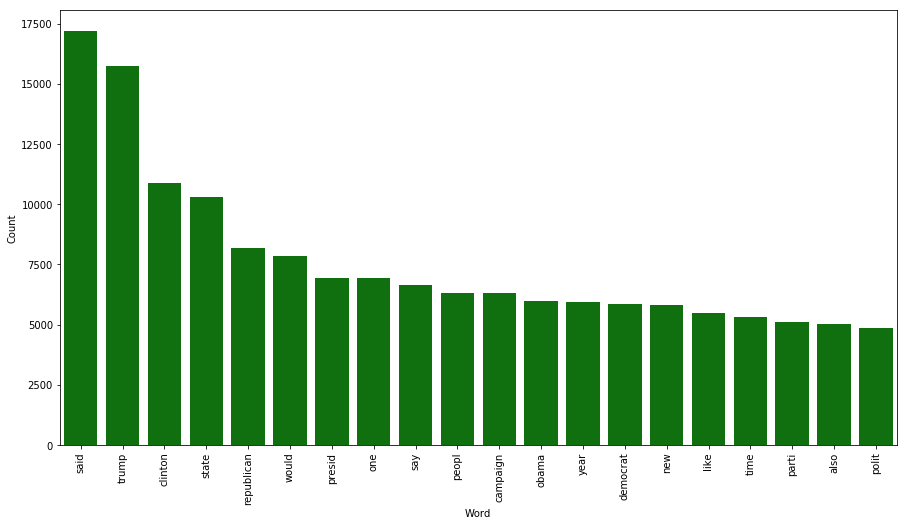

In [117]:
#frequency of most real word
counter(df2[df2['label'] == 1], 'stemming_text', 20)

In [21]:
#lammetizing and cleaning

corpus_lemmetize = []
for i in range(0, len(message)):
    review=re.sub(r'http\S+',' ',message['text'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    
    review = [lem.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_lemmetize.append(review)

In [22]:
corpus_lemmetize[:2]

['daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word unprecedented thrown around often election ought retired still unprecedented nominee major political party go war fbi exactly hillary people done coma patient waking watching hour cnn hospital bed would assume fbi director james comey hillary opponent election fbi attack everyone obama cnn hillary people circulated letter attacking comey currently medium hit piece lambasting targeting trump surprising clinton ally start running attack ad fbi fbi leadership warned entire left wing establishment form lynch mob continue going hillary fbi credibility attacked medium democrat preemptively head result investigation clinton foundation hillary clinton covert struggle fbi agent obama doj people gone explosively public new york time compared comey j edgar hoover bizarre headline james comey role recall hoover fbi fairly practically a

In [23]:
len(corpus_lemmetize)

6335

In [24]:
#countvectoriser with stemming

from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer(max_features=5000, ngram_range=(1,3))
x_stem=CV.fit_transform(corpus_stem).toarray()
x_stem

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
print(x_stem.shape)

(6335, 5000)


In [26]:
#countvectorizer with lemmetizing

from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer(max_features=5000)
x_lem=CV.fit_transform(corpus_lemmetize).toarray()
x_lem

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
print(x_lem.shape)

(6335, 5000)


In [28]:
#TF-IDF for stemming

from sklearn.feature_extraction.text import TfidfVectorizer
tf_stem=TfidfVectorizer()
x_tf_stem=tf_stem.fit_transform(corpus_stem)
print(x_tf_stem.shape)


(6335, 43312)


In [129]:
#TF-IDF for lemmatizing

from sklearn.feature_extraction.text import TfidfVectorizer
tf_stem=TfidfVectorizer()
x_tf_lem=tf_stem.fit_transform(corpus_lemmetize)
print(x_tf_lem.shape)

(6335, 57599)


In [31]:
y=df['label']
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int32

# making the model by using countvectorizer and stemming

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_stem,y,test_size=0.2)

In [137]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5068, 5000), (1267, 5000), (5068,), (1267,))

In [138]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [139]:
model.score(X_test,y_test)

0.8895027624309392

In [140]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[558,  51],
       [ 89, 569]], dtype=int64)

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       609
           1       0.92      0.86      0.89       658

   micro avg       0.89      0.89      0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



Text(69,0.5,'True')

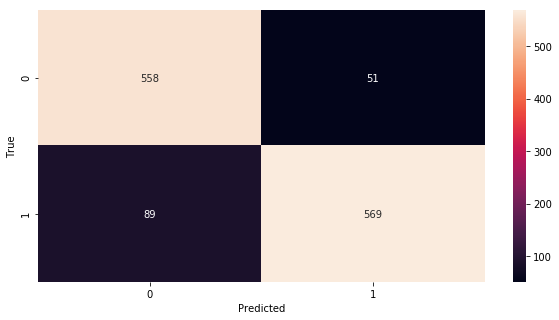

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

# making the model by using lemmetizing and countvectorizer

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_lem,y,test_size=0.2)

In [152]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5068, 5000), (1267, 5000), (5068,), (1267,))

In [153]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [154]:
model.score(X_test,y_test)

0.8681925808997633

In [155]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[573,  77],
       [ 90, 527]], dtype=int64)

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       650
           1       0.87      0.85      0.86       617

   micro avg       0.87      0.87      0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267



Text(69,0.5,'True')

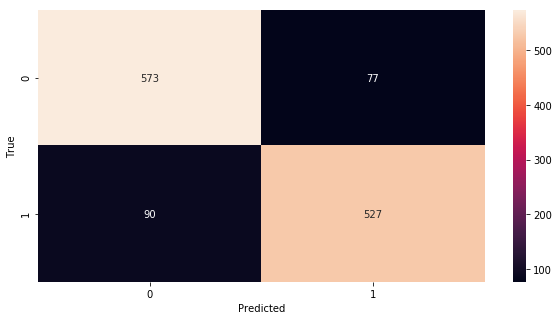

In [157]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

# making the model by using TF-IDF and stemming

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_tf_stem,y,test_size=0.2)

In [159]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5068, 43312), (1267, 43312), (5068,), (1267,))

In [160]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [161]:
model.score(X_test,y_test)

0.861878453038674

In [162]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[479, 164],
       [ 11, 613]], dtype=int64)

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       643
           1       0.79      0.98      0.88       624

   micro avg       0.86      0.86      0.86      1267
   macro avg       0.88      0.86      0.86      1267
weighted avg       0.88      0.86      0.86      1267



Text(69,0.5,'True')

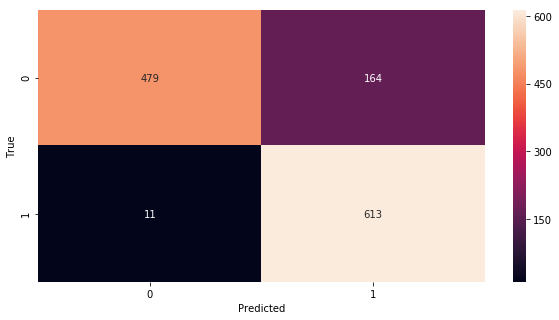

In [164]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

# making the model by using TF-IDF and lemmetizing

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_tf_lem,y,test_size=0.2)

In [166]:
x_tf_lem.shape

(6335, 57599)

In [168]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [169]:
model.score(X_test,y_test)

0.8374112075769534

In [170]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[433, 194],
       [ 12, 628]], dtype=int64)

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81       627
           1       0.76      0.98      0.86       640

   micro avg       0.84      0.84      0.84      1267
   macro avg       0.87      0.84      0.83      1267
weighted avg       0.87      0.84      0.83      1267



Text(69,0.5,'True')

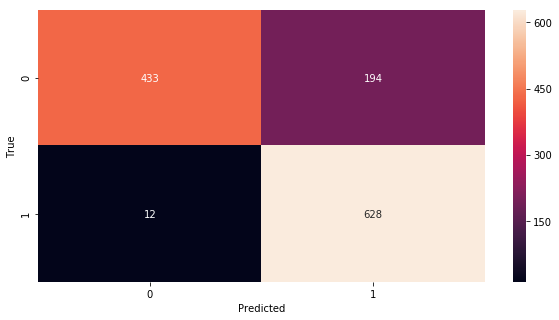

In [172]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

# Hence, we can go through that with Lememtizing and CountVectorizer as it is giving almost 86%, with Stemming and CountVectorizer it is giving 88% and TF-IDF with stemming is also giving 86%.

# Let's check the accuracy after applying hyperparameter in MultinomialNB

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_stem,y,test_size=0.2)

classifier=MultinomialNB(alpha=0.1)

from sklearn import metrics
import numpy as np
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8808208366219415
Alpha: 0.1, Score : 0.8792423046566693
Alpha: 0.2, Score : 0.8784530386740331
Alpha: 0.30000000000000004, Score : 0.8784530386740331
Alpha: 0.4, Score : 0.8784530386740331
Alpha: 0.5, Score : 0.8784530386740331
Alpha: 0.6000000000000001, Score : 0.8784530386740331
Alpha: 0.7000000000000001, Score : 0.8784530386740331
Alpha: 0.8, Score : 0.877663772691397
Alpha: 0.9, Score : 0.877663772691397


# Now let's check with other classifier algorithm like DecisionTreeClassifier, RandamForestClassifier, SVM, LogisticRegression by using GridSearchCV and crossvalidation

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,25,30,40],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10,15,20,25]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    }
}

In [64]:
scores = []

X_train, X_test, y_train, y_test= train_test_split(x_stem,y,test_size=0.2)

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.897790,"{'C': 40, 'kernel': 'rbf'}"
1,random_forest,0.885754,{'n_estimators': 30}
2,logistic_regression,0.908642,{'C': 1}
3,decision_tree,0.815706,{'criterion': 'entropy'}


# Hence we conclude that this model play's best in LogisticRegression, SVM, RandamForestClassifier